In [1]:
#Importing data from csv
from pandas import read_csv
import pandas as pd

terran_data = read_csv('../Output/terranJan.csv', header=0, index_col=False)
display(terran_data)

,match_id,map_name,region,game_length,race,frame,second,player,workers_active_count,food_used,...,starport,starportreactor,starporttechlab,supplydepot,techlab,thor,viking,warhound,widowmine,win
0,1,World of Sleepers LE,us,437,T,1,0,Player 1 - INnoVation (Terran),12,12,...,0,0,0,0,0,0,0,0,0,1
1,1,World of Sleepers LE,us,437,T,480,30,Player 1 - INnoVation (Terran),13,14,...,0,0,0,1,0,0,0,0,0,1
2,1,World of Sleepers LE,us,437,T,960,60,Player 1 - INnoVation (Terran),15,16,...,0,0,0,1,0,0,0,0,0,1
3,1,World of Sleepers LE,us,437,T,1440,90,Player 1 - INnoVation (Terran),17,18,...,0,0,0,1,0,0,0,0,0,1
4,1,World of Sleepers LE,us,437,T,1920,120,Player 1 - INnoVation (Terran),18,19,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9941,999,Submarine LE,us,1038,T,21120,1320,Player 1 - Seither (Terran),55,179,...,1,1,0,18,0,0,0,0,10,1
9942,999,Submarine LE,us,1038,T,21600,1350,Player 1 - Seither (Terran),55,192,...,1,1,0,18,0,0,0,0,12,1
9943,999,Submarine LE,us,1038,T,22080,1380,Player 1 - Seither (Terran),55,195,...,1,1,0,18,0,0,0,0,14,1
9944,999,Submarine LE,us,1038,T,22560,1410,Player 1 - Seither (Terran),52,194,...,1,1,0,18,0,0,0,0,14,1


In [2]:
from sklearn.preprocessing import MinMaxScaler

no_normalize = ['match_id','map_name','region','race','frame','second','player']

#Names of Columns that we want to Normalize (Numerical variables only)
normalize_columns = [x for x in list(terran_data) if x not in no_normalize]

#Normalizing these columns
norm = terran_data[normalize_columns].values
norm_scaled = MinMaxScaler().fit_transform(norm)
terran_data_normalized = pd.DataFrame(norm_scaled, columns=normalize_columns, index=terran_data.index)

#One-hot Encoding the categorical variables
terran_data_normalized = terran_data_normalized.join(pd.get_dummies(terran_data['map_name'], prefix='Map'))
terran_data_normalized = terran_data_normalized.join(pd.get_dummies(terran_data['region'], prefix='Result'))
terran_data_normalized = terran_data_normalized.join(pd.get_dummies(terran_data['race'], prefix='Race'))

#Displaying first and last 5 rows
display(terran_data_normalized.head(5), terran_data_normalized.tail(5))

,game_length,workers_active_count,food_used,food_made,minerals_current,minerals_collection_rate,minerals_used_in_progress,minerals_used_current,minerals_used_active_forces,minerals_lost,...,Map_아크로폴리스 - 래더,Map_월드 오브 슬리퍼스 - 래더,Map_윈터스 게이트 - 래더,Map_이페머론 - 래더,Map_트라이튼 - 래더,Result_cn,Result_eu,Result_kr,Result_us,Race_T
0,0.217239,0.131868,0.060,0.000000,0.012186,0.000000,0.000000,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,1,1
1,0.217239,0.142857,0.070,0.000000,0.012186,0.155508,0.044118,0.002125,0.0,0.0,...,0,0,0,0,0,0,0,0,1,1
2,0.217239,0.164835,0.080,0.022663,0.015842,0.155508,0.058824,0.010627,0.0,0.0,...,0,0,0,0,0,0,0,0,1,1
3,0.217239,0.186813,0.090,0.022663,0.032903,0.185455,0.080882,0.014878,0.0,0.0,...,0,0,0,0,0,0,0,0,1,1
4,0.217239,0.197802,0.095,0.022663,0.098708,0.161497,0.058824,0.020191,0.0,0.0,...,0,0,0,0,0,0,0,0,1,1


,game_length,workers_active_count,food_used,food_made,minerals_current,minerals_collection_rate,minerals_used_in_progress,minerals_used_current,minerals_used_active_forces,minerals_lost,...,Map_아크로폴리스 - 래더,Map_월드 오브 슬리퍼스 - 래더,Map_윈터스 게이트 - 래더,Map_이페머론 - 래더,Map_트라이튼 - 래더,Result_cn,Result_eu,Result_kr,Result_us,Race_T
9941,0.567268,0.604396,0.895,0.665722,0.167438,0.395080,0.235294,0.667375,0.656442,0.333492,...,0,0,0,0,0,0,0,0,1,1
9942,0.567268,0.604396,0.960,0.665722,0.052888,0.407059,0.382353,0.671626,0.638037,0.344665,...,0,0,0,0,0,0,0,0,1,1
9943,0.567268,0.604396,0.975,0.665722,0.074823,0.514866,0.242647,0.703507,0.730061,0.351648,...,0,0,0,0,0,0,0,0,1,1
9944,0.567268,0.571429,0.970,0.665722,0.194004,0.419037,0.205882,0.697131,0.754601,0.370503,...,0,0,0,0,0,0,0,0,1,1
9945,0.567268,0.571429,0.930,0.623229,0.291007,0.371123,0.147059,0.666312,0.720859,0.396341,...,0,0,0,0,0,0,0,0,1,1


In [3]:
#Split data into dependent and independent variables
no_X = ['win']
yes_X = [x for x in list(terran_data_normalized) if x not in no_X]

Y = terran_data_normalized['win']
X_normalized = terran_data_normalized[yes_X]

In [4]:
#Split data into training, validation and testing set
train_split = 0.8
val_split = 0.2

num_data = len(terran_data_normalized)
num_val = int(train_split * val_split * num_data)
num_train = int(train_split * num_data) - num_val
num_test = num_data - int(train_split * num_data)


Y_train = Y[0:num_train]
Y_val = Y[num_train:(num_train + num_val)]
Y_test = Y[(num_val + num_train):]


X_normalized_train = X_normalized[0:num_train]
X_normalized_val = X_normalized[num_train:(num_train + num_val)]
X_normalized_test = X_normalized[(num_val + num_train):]

In [5]:
X_train = terran_data_normalized[0:num_train]
X_val = terran_data_normalized[num_train:(num_train + num_val)]
X_test = terran_data_normalized[(num_val + num_train):]

In [6]:
Y_train.shape

(6365,)

In [7]:
X_train.shape

(6365, 100)

In [8]:
import numpy as np

class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=X_train, val_df=X_val, test_df=X_test,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [9]:
w1 = WindowGenerator(input_width=10, label_width=1, shift=1,
                     label_columns=['win'])
w1

Total window size: 11
Input indices: [0 1 2 3 4 5 6 7 8 9]
Label indices: [10]
Label column name(s): ['win']

In [10]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [11]:
import tensorflow as tf

# Stack three slices, the length of the total window:
example_window = tf.stack([np.array(terran_data_normalized[:w1.total_window_size])])



example_inputs, example_labels = w1.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (1, 11, 100)
Inputs shape: (1, 10, 100)
labels shape: (1, 1, 1)


In [12]:
import matplotlib.pyplot as plt

def plot(self, model=None, plot_col='win', max_subplots=1):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(3, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [30 Second]')

WindowGenerator.plot = plot

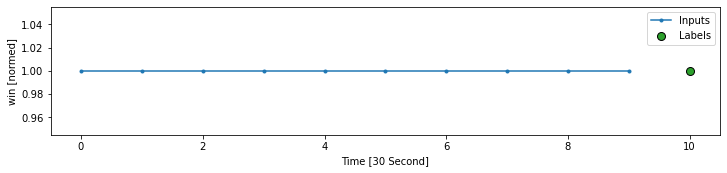

In [13]:
w1.example = example_inputs, example_labels
w1.plot()

In [14]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [15]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [16]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['win'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['win']

In [17]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [18]:
column_indices = {name: i for i, name in enumerate(terran_data_normalized.columns)}

baseline = Baseline(label_index=column_indices['win'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

Input indices: [0]
Label indices: [1]
Label column name(s): ['win']> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Input indices: [0]
Label indices: [1]
Label column name(s): ['win']> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence

In [19]:
wide_window = WindowGenerator(
    input_width=10, label_width=10, shift=5,
    label_columns=['win'])

wide_window

Total window size: 15
Input indices: [0 1 2 3 4 5 6 7 8 9]
Label indices: [ 5  6  7  8  9 10 11 12 13 14]
Label column name(s): ['win']

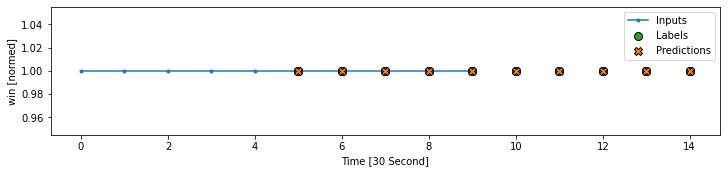

In [20]:
#Baseline

wide_window.plot(baseline)

In [21]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [22]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [23]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
199/199 [==============================] - 0s 2ms/step - loss: 0.2402 - mean_absolute_error: 0.4289 - val_loss: 0.1998 - val_mean_absolute_error: 0.4061
Epoch 2/20
199/199 [==============================] - 0s 1ms/step - loss: 0.1360 - mean_absolute_error: 0.3386 - val_loss: 0.1399 - val_mean_absolute_error: 0.3360
Epoch 3/20
199/199 [==============================] - 0s 1ms/step - loss: 0.0859 - mean_absolute_error: 0.2660 - val_loss: 0.0986 - val_mean_absolute_error: 0.2756
Epoch 4/20
199/199 [==============================] - 0s 1ms/step - loss: 0.0560 - mean_absolute_error: 0.2072 - val_loss: 0.0714 - val_mean_absolute_error: 0.2255
Epoch 5/20
199/199 [==============================] - 0s 1ms/step - loss: 0.0381 - mean_absolute_error: 0.1598 - val_loss: 0.0535 - val_mean_absolute_error: 0.1861
Epoch 6/20
199/199 [==============================] - 0s 1ms/step - loss: 0.0277 - mean_absolute_error: 0.1240 - val_loss: 0.0430 - val_mean_absolute_error: 0.1591
Epoch 7/20
199/1

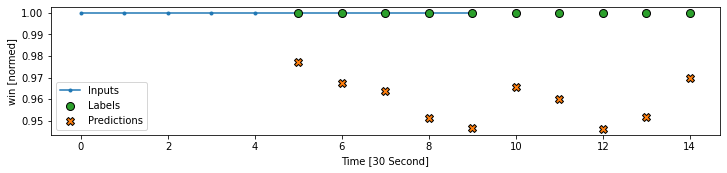

In [24]:
#Linear

wide_window.plot(linear)

In [25]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
199/199 [==============================] - 0s 2ms/step - loss: 0.0502 - mean_absolute_error: 0.1289 - val_loss: 0.0302 - val_mean_absolute_error: 0.1204
Epoch 2/20
199/199 [==============================] - 0s 1ms/step - loss: 0.0159 - mean_absolute_error: 0.0520 - val_loss: 0.0296 - val_mean_absolute_error: 0.1173
Epoch 3/20
199/199 [==============================] - 0s 1ms/step - loss: 0.0149 - mean_absolute_error: 0.0476 - val_loss: 0.0298 - val_mean_absolute_error: 0.1146
Epoch 4/20
50/50 [==============================] - 0s 946us/step - loss: 0.0376 - mean_absolute_error: 0.1356


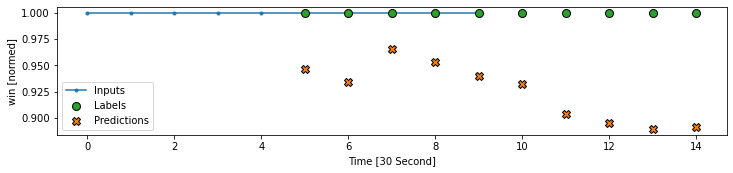

In [26]:
#Dense

wide_window.plot(dense)

In [27]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['win'])

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['win']

In [28]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [29]:
history = compile_and_fit(conv_model, conv_window)

val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

Epoch 1/20
199/199 [==============================] - 0s 2ms/step - loss: 0.0983 - mean_absolute_error: 0.2056 - val_loss: 0.0291 - val_mean_absolute_error: 0.1045
Epoch 2/20
199/199 [==============================] - 0s 2ms/step - loss: 0.0205 - mean_absolute_error: 0.0650 - val_loss: 0.0273 - val_mean_absolute_error: 0.1094
Epoch 3/20
199/199 [==============================] - 0s 1ms/step - loss: 0.0179 - mean_absolute_error: 0.0622 - val_loss: 0.0251 - val_mean_absolute_error: 0.1022
Epoch 4/20
199/199 [==============================] - 0s 1ms/step - loss: 0.0161 - mean_absolute_error: 0.0580 - val_loss: 0.0241 - val_mean_absolute_error: 0.0985
Epoch 5/20
199/199 [==============================] - 0s 1ms/step - loss: 0.0151 - mean_absolute_error: 0.0523 - val_loss: 0.0219 - val_mean_absolute_error: 0.0882
Epoch 6/20
199/199 [==============================] - 0s 1ms/step - loss: 0.0151 - mean_absolute_error: 0.0527 - val_loss: 0.0208 - val_mean_absolute_error: 0.0855
Epoch 7/20
199/1

In [30]:
LABEL_WIDTH = 5
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['win'])

wide_conv_window

Total window size: 8
Input indices: [0 1 2 3 4 5 6]
Label indices: [3 4 5 6 7]
Label column name(s): ['win']

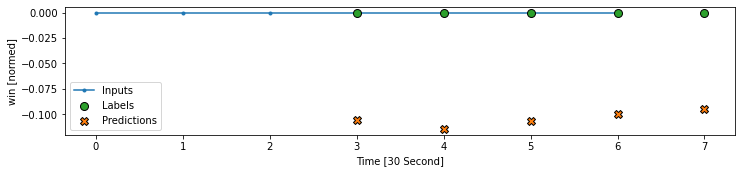

In [31]:
#CNN

wide_conv_window.plot(conv_model)

In [32]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(5, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [33]:
history = compile_and_fit(lstm_model, wide_window)

val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

Epoch 1/20
199/199 [==============================] - 1s 6ms/step - loss: 0.1708 - mean_absolute_error: 0.3416 - val_loss: 0.1646 - val_mean_absolute_error: 0.3330
Epoch 2/20
199/199 [==============================] - 1s 3ms/step - loss: 0.0854 - mean_absolute_error: 0.2035 - val_loss: 0.1356 - val_mean_absolute_error: 0.2924
Epoch 3/20
199/199 [==============================] - 1s 3ms/step - loss: 0.0693 - mean_absolute_error: 0.1657 - val_loss: 0.1230 - val_mean_absolute_error: 0.2709
Epoch 4/20
199/199 [==============================] - 1s 3ms/step - loss: 0.0633 - mean_absolute_error: 0.1494 - val_loss: 0.1145 - val_mean_absolute_error: 0.2557
Epoch 5/20
199/199 [==============================] - 1s 3ms/step - loss: 0.0601 - mean_absolute_error: 0.1405 - val_loss: 0.1170 - val_mean_absolute_error: 0.2584
Epoch 6/20
199/199 [==============================] - 1s 3ms/step - loss: 0.0583 - mean_absolute_error: 0.1362 - val_loss: 0.1117 - val_mean_absolute_error: 0.2482
Epoch 7/20
199/1

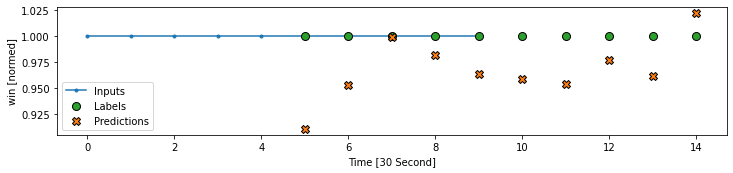

In [34]:
#LSTM

wide_window.plot(lstm_model)

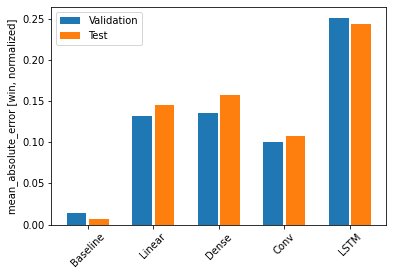

In [35]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [win, normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()